## **Assignment One (EECS3404 W25)**

**your name:**  arianne ghislaine rull \\
**your student number:**  219129527 \\
**your yorku email:** arull@yorku.com

This assignment is mainly for you to review mathematical background and vectorization-based programming. You have to work individually. Remember to fill in your information (name, student number, email) at above.



##**What to Submit**

Please use this notebook to complete assignment one. You have to run your codes and show the results in this notebook. Download the completed notenook as `.ipynb` and compress it as a `.zip` file to submit to eClass.  Submit only ONE notebook file that contains all of your answers and codes to eClass before the deadline.  No late submission
will be accepted.

* For all written parts, write your answers in text cells. To avoid confusions in marking, better to embed latex codes there to represent all mathematical notations and equations.  **No handwriting is accepted**.

* For programming parts, you should give codes, comments, explanations and the proper running outputs in both code and text cells. Make your jupyter notebook clean and concise. Remove all unused codes and all intermediate results from the submitted notebook. The submitted notebook should include only the final (best) outputs for each question. Also make sure every code cell runnable so that markers can reproduce the outputs if necessary.

### **Q1** (10 marks)  **Matrix Multiplication** ###

Given two sets of $m$ vectors, $\mathbf{x}_i \in \mathbb{R}^n$  and $\mathbf{y}_i \in \mathbb{R}^n$ for all $i=1,2, \cdots, m$, verify that the summation $\sum_{i=1}^m  \mathbf{x}_i  \mathbf{y}_i^\intercal$ can be vectorized as the following matrix multiplication:
$$
\sum_{i=1}^m \mathbf{x}_i \mathbf{y}_i^\intercal = \mathbf{X}  \mathbf{Y}^\intercal,
$$
where $\mathbf{X} = \big[ \mathbf{x}_1 \, \mathbf{x}_2 \, \cdots \, \mathbf{x}_m \big] \in \mathbb{R}^{n\times m}$ and $\mathbf{Y} = \big[ \mathbf{y}_1 \, \mathbf{y}_2 \, \cdots \, \mathbf{y}_m \big] \in \mathbb{R}^{n\times m}$.

*write your answer to Q1 here:*


### Definitions

1. Define $ \mathbf{x}_i \in \mathbb{R}^n  $ as a column vector of dimension $  n  $.
2. Define $ \mathbf{y}_i \in \mathbb{R}^n \ $ as another column vector of dimension $ n $.
3. Let $ \mathbf{X} = [\mathbf{x}_1 \, \mathbf{x}_2 \, \cdots \, \mathbf{x}_m] \in \mathbb{R}^{n \times m} \ $ be a matrix where each column corresponds to  $  \mathbf{x}_i $.
4. Similarly, let $ \ \mathbf{Y} = [\mathbf{y}_1 \, \mathbf{y}_2 \, \cdots \, \mathbf{y}_m] \in \mathbb{R}^{n \times m} \ $.

### Proof

1. **Matrix Multiplication**: By definition, $ \mathbf{Y}^T \in \mathbb{R}^{m \times n} \ $ is the transpose of  $ i$-th row of $ ( \mathbf{Y}^T ) $ corresponds to the $ i$-th column of $ \mathbf{Y} \ $
2. Consider the product $ ( \mathbf{X} \mathbf{Y}^T) $. The result is a matrix of size $ ( n \times n ) $. Each element of $ ( \mathbf{X} \mathbf{Y}^T) $ can be expressed as:

$$
\left( X Y^T \right)_{jk} = \sum_{i=1}^m \left( \mathbf{x}_i \right)_j \left( \mathbf{y}_i \right)_k
$$

   where $ \ (\mathbf{x}_i)_j \ $ is the $ j $-th element of the $ i $-th vector $  \mathbf{x}_i \ $, and $ (\mathbf{y}_i)_k \ $ is the $ k $-th element of the $ i$-th vector $ \mathbf{y}_i  $

3. **Vectorized Summation**: Now consider the summation $ \ \sum_{i=1}^m \mathbf{x}_i \mathbf{y}_i^T \ $. Each term in the summation is an outer product of $  \mathbf{x}_i \in \mathbb{R}^n \ $ and $ \mathbf{y}_i^T \in \mathbb{R}^n  $ , resulting in an $  n \times n  $ matrix. The $  j, k  $ -th element of this sum is:
$
   [
   \left( \sum_{i=1}^m \mathbf{x}_i \mathbf{y}_i^T \right)_{jk} = \sum_{i=1}^m (\mathbf{x}_i)_j (\mathbf{y}_i)_k
   ]
$

4. Comparing with the definition of $  (\mathbf{X}\mathbf{Y}^T)_{jk}  $, we see that:
$
   [
   \sum_{i=1}^m \mathbf{x}_i \mathbf{y}_i^T = \mathbf{X}\mathbf{Y}^T
   ]
$

Thus, $ \sum_{i=1}^m \mathbf{x}_i \mathbf{y}_i^T = \mathbf{X}\mathbf{Y}^T $

We confirmed that the left hand and right hand side are equal.




---



### **Q2** (20 marks)  **Vectorized Programming** ###

**Part 2.1 (10 marks):**

Given a set of $N$ feature vectors,
$$
\big\{ \mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_N  \big\}
$$
where each vector $\mathbf{x}_i \in \mathbb{R}^d$,
write a python program to calculate the pairwise inner products and store the results in a matrix ${\mathbf A} \in \mathbb{R}^{N \times N}$: the element located
at the $i$-th row and $j$-th column represents the inner product as follows:
$$
a_{ij} =  \mathbf{x}_i \cdot \mathbf{x}_j  \;\;\;\;\; (1 \leq i,j \leq N)
$$

Discuss why the following code is NOT an efficient implementation. Next, rewrite a vectorized program for better implementation efficiency. Compare your code with the provided one in terms of running speed. Also provide a detailed mathematical derivation to explain your vectorization-based implementation.

In [ ]:
import numpy as np

N = 5000 # generate N=5000 samples
d = 784  # dimension of each vector

# generate all samples and save them in matrix X, where each row represents a vector x_i
X = np.random.normal(size=(N,d))

def inner_product_loops(X):
  N = X.shape[0]
  A = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      A[i,j] = np.dot(X[i,:], X[j,:])
  return A

%timeit inner_product_loops(X)

*write your answer to Q2.1 here:*

**Why is the code not an efficient implementation?**

1. Time Complexity

*   The given code uses nested loops to compute the dot product for every pair of vectors.
This computes the inner product of each pair of vectors. The outer loop runs for `N` iterations, and for each iteration, the inner loop also runs for `N` iterations. This time complexity is `O(N^2)` which can get very slow when the n is large.

2. Memory Access

* This program computes the product using `np.dot(X[i], X[j])`, which requires iterating over all d elements of the vectors each time. The method involves unnecessary recomputations and can be optimized by vectorizing the inner product calculation.



**Rewrite the code.**


Instead of manually computing the dot products using loops, we can use matrix multiplication.

The inner product between all pairs of vectors can be represented as the matrix product of the matrix `X` with its transpose.

The pairwise dot products can be computed as:

$$A = X \cdot X^T$$



*   $ \mathbf{X} \$ is the matrix containing all the feature vectors as rows


*   $ \mathbf{X}^T \ $ is the transpose of $ \mathbf{X} \ $

* The result of $X \cdot X^T$ is an $N \times N$ matrix, where the entry at position $(i, j)$ is the dot product of $\mathbf{x}_i$ and $\mathbf{x}_j$.


In [ ]:
# Write your vectorized code for Q2.1 here
import numpy as np

N = 5000 # generate N=5000 samples
d = 784  # dimension of each vector

# Generate all samples and save them in matrix X, where each row represents a vector x_i
X = np.random.normal(size=(N, d))

def inner_product_vectorized(X):
  return np.dot(X, X.T) # Matrix multiplication betweent X and X^T (its transpose)


%timeit inner_product_vectorized(X)

1.92 s ± 320 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Compare the code.**

1. Loop based implementation - this takes much longer to compute due to the loops and repeated row accesses
2. Vectorized implementation - this uses efficient matrix multiplication because there is no python loop overhead

Based on the measure time taken by the vectorized implementation, it is faster

**Add the mathematical derivation.**

1. Input is $X$
2. Goal is to compute a matrix $A$ of size $ N \times N $ where each element $A[i,j]$ is the inner product of the vectors
3. Instead of calculating $A[i,j]$ one-by-one loops, we use matrix multiplication:
$$A = X \cdot X^T$$

Here:
* $X$ is the original matrix ($N \times d$)
* $X^T$ is the transpose of $X$ ($N \times d$)

When we multiply $X$ and $X^T$ the result is an $N \times N$ matrix A where:

$$A[i,j] = \mathbf{x}_i \cdot \mathbf{x}_j$$



**Part 2.2 (10 marks):**

Assume that we want to compute the Euclidean distance between another vector $\mathbf{y} \in \mathbb{R}^d$ and every vector $\mathbf{x}_i $ in the above set. Write a vectorized program to compute these distances and save them in a vector. Note that you need to provide a detailed mathematical derivation to explain your vectorization-based implementation.

1. write a vectorized program to compute and save them in a vector
2. mathematical derivation

*write your answer to Q2.2 here:*

**Euclidean Distance**

the euclidean distance between two vectors **x<sub>i</sub>** and **y** is given by:

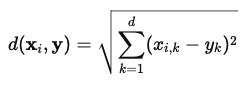


This means:
1. Subtract each element of $y$ from the corresponding element of **x<sub>i</sub>**
2. Square the result of each subtraction.
3. Add up all these squares.
4. Finally, take the square root of this sum.

What if we want to do this for all vectors?

We have a set of N vectors **{x<sub>1</sub>, x<sub>2</sub>,...,x<sub>n</sub>}** and want to compute the distance between **y** and each **x<sub>i</sub>**

To make this efficient, we can do it all for $N$ vectors at once by using matrix operations.

Step-by-Step Derivation for All Vectors:

1. Subtraction


*   For each $ \mathbf{x}_i $, subtract $y$ element-wise

* If $X$ is a matrix where each row is a vector $ \mathbf{x}_i $ , then $ X - y $ subtracts $y$ from each row of $X$

*   Result: A new matrix of size $ N \times d$, where each row is $ \mathbf{x}_i - \mathbf{y} $



2. Square the differences
*   Square each element of the result from step 1 to get $  (x_{i,k} - y_k)^2  $
* Result: Another $N \times d$ matrix, where each row contains the square differences for a vector $ $

3. Sum the squares
* Add up all the squared differences for each vector $ x_{i}$
* Mathematically: $ \sum_{k=1}^{d} (x_{i,k} - y_k)^2 $
* Result: A vector of size $N$, where each element is the sum of squared differences for a specific $x_{i}$

4. Take the square root
* Take the square root of each element in the result from step 3 to get the final Euclidean distances.
* Result: A vector of size $N$, where each element is the distance $d(x_{i}, y)$

Final Formula in Matrix Form:
For all $N$ vectors in $X$, the Euclidean distances can be computed as:

$ \mathbf{d} = \sqrt{\text{row-wise sum of } (\mathbf{X} - \mathbf{y})^2} $



In [ ]:
# Write your vectorized code for Q2.2 here

In [ ]:
import numpy as np

# Generate N vectors (X) of dimension d and a single vector y
N = 5000 # number of vectors
d = 784  # dimension of each vector
X = np.random.normal(size=(N, d)) # Matrix of N vectors
y = np.random.normal(size=(d,)) # Single vector

def euclidean_distance_vectorized(X, y):
  # Compute the squared differences
  squared_diff = (X - y) ** 2
  # Sum along the second axis (dimension d)
  sum_squared_diff = np.sum(squared_diff, axis=1)
  # Take the square root
  # take the square root in order to get the euclidean distances
  distances = np.sqrt(sum_squared_diff)
  return distances

# compute the distances
distances = euclidean_distance_vectorized(X, y)
print(distances)


[40.28945771 39.22085223 40.3527181  ... 39.08675243 39.36479703
 40.9373935 ]


Code Explanation
1. Subtraction:
- $X - y$ computes the difference between each row of $X$ (a vector $x_{i}$) and y. Broadcasting ensures $y$ is subtracted from all rows of $X$
2. Element-wise Square:
- $(X-y)$ ** 2 squares each element of the resulting matrix
3. Row-wise Summation:
- np.sum(squared_diff, axis=1) sums the squared differences along each row (dimension d), yielding a vector of size $N$
4. Square Root:
- np.sqrt(sum_squared_diff) computes the square root of each element to get the final Euclidean distances

\
\begin{array}{|c|c|}
\hline
\textbf{Operation} & \textbf{Time Complexity} \\ \hline
\text{Subtraction} & O(N \cdot d) \\ \hline
\text{Element-wise Square} & O(N \cdot d) \\ \hline
\text{Summation} & O(N \cdot d) \\ \hline
\text{Square Root} & O(N) \\ \hline
\textbf{Overall} & O(N \cdot d) \\ \hline
\end{array}



Why is this efficient?
Because there is no loops and it uses Numpy's optimized backend which results into a faster execution

The loop based approach would compute the distance for each vector $x_{i}$ individually with a time complexity of $ O(N \cdot d) $ but with higher constant factors due to the Python loop overhead



### **Q3** (20 marks) **k-NN** ###

**Part 3.1 (10 marks):**
Study [the given sample code](https://colab.research.google.com/drive/1JS3l6116ldySnReIWhP5wQxKVSehm7cj), and then modify the code to apply the $k$-NN method to classify the iris data using all provided four features. Show the classification accuracies for different $k$ values.  

In [ ]:
# Write your code for Q3.1 here

# the algorithm

# step 1: import the modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# step 2: load iris dataset
iris = load_iris()

# step 3: use all four features for the dataset

# load all the features

X = iris.data

# target the labels
y = iris.target


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [ ]:
# seeing the accuracy results

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

for k in range(1, 11):
  # build the kNN model
  classifier  = KNeighborsClassifier(n_neighbors=k)
  # train the kNN
  classifier.fit(X_train, y_train)
  # predict on test set
  y_pred = classifier.predict(X_test)

  # get the accuracy score
  accuracy = accuracy_score(y_test, y_pred)*100
  print(f"kNN model accuracy (k={k}) is {accuracy:.2f}%" )

kNN model accuracy (k=1) is 97.37%
kNN model accuracy (k=2) is 97.37%
kNN model accuracy (k=3) is 97.37%
kNN model accuracy (k=4) is 97.37%
kNN model accuracy (k=5) is 97.37%
kNN model accuracy (k=6) is 97.37%
kNN model accuracy (k=7) is 97.37%
kNN model accuracy (k=8) is 97.37%
kNN model accuracy (k=9) is 97.37%
kNN model accuracy (k=10) is 97.37%


**Part 3.2 (10 marks):**
Based on your vectorized program in Q2.2, instead of using `sciki-learn`, implement the $k$-NN method from scratch (only for Euclidean distance and uniform voting). Apply your method to the iris data as in Q3.1 and compare your code with that of Q3.1 in terms of accuracy and running speed. Discuss your findings.

1. apply
2. compare code
3. discuss finidngs

###1. Load and Split the Iris Data###



In [ ]:
# Write your code for Q3.2 here
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# then load the iris dataset
iris = load_iris()
X = iris.data  # shape: (150, 4)
y = iris.target # shape: (150, )

# split into train and test sets for evaluatiobn
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)


###2. Vectorized Euclidean Distance Function###

This function calculates the Euclidean distance between all rows in the test set $(X_{test})$ and the training set $(X_{train})$ in one go for speed. The output is a matrix where each entry represents the distance between a test sample and a training sample.

Steps
1. Broadcasting Trick:


*   Expand dimensions to align $(X_{test})$ and $(X_{train})$ for subtraction
*   Subtract $X_{train}$ from $X_{test}$ resulting in a difference matrix


2. Compute Squared Distances:
*   Square the differences and sum them along the feature dimension.

3. Square Root:
*   Take the square root to get the final Euclidean distances

The result is a distance matrix of shape (num_test, num_train)


In [ ]:
def euclidean_distance_matrix(X_test, X_train):
  """
  Compute the euclidean distance between each row of X_test and each row of X_train.

  X_test: (num_test, d)
  X_train: (num_train, d)


  Returns:
  distances: (num_test, num_train)


  Broadcasting trick:
  X_test[:, None, :] => (num_test, 1, d)
  X_train[None, :, :] => (1, num_train, d)
  Subtract => (num_test, num_train, d)

  """

  diff = X_test[:, None, :] - X_train[None, :, :]

  # Square and sum along the feature dimension (axis=2)
  dist_squared = np.sum(diff**2, axis=2) # shape: (num_test, num_train)

  # Square root gives the Euclidean distance
  distances = np.sqrt(dist_squared)


  return distances


###3. Implement k-NN Classifier From Scratch###
Basic k-NN with uniform voting


1.   Compute distances: For each test sample, find its distances to all training samples.
2.   Find the k nearest neighbors: Sort or partially sort these distances to get the indices of the top k.
3.   Majority vote: Among those k neighbors, the predicted class is the one that appears the most frequently.



In [ ]:
def knn_predict(X_train, y_train, X_test, k):
  """
  Predict the class labels for the X_test using a k-NN classifier with Euclidean distance and uniform voting

  Parameters
  X_train: (num_train, d)
  y_train: (num_train, )
  X_test: (num_test, d)
  k: int

  Returns:
  y_pred: (num_test,) Predicted labels for each row of X_test

  1. Compute all pairwise distances: shape => (num_test, num_train)
  2. For each test row, find the k-nearest neighbors
  3. Find the majority vote

  """

  # 1) Compute all pairwise distances: shape => (num_test, num_train)
  distances = euclidean_distance_matrix(X_test, X_train)

  # 2) For each test row, find the k nearest neighbors
  # argsort along axis=1 sorts each row's distances
  sorted_indices = np.argsort(distances, axis=1) # (num_test, num_train)
  k_closest = sorted_indices[:, :k] # (num_test, k)

  # 3) Majority vote
  y_pred = []
  for i in range(X_test.shape[0]):
    # gather the labels of the k nearest neighbors
    neighbor_labels = y_train[k_closest[i]]
    # find the most frequent labels
    values, counts = np.unique(neighbor_labels, return_counts=True)
    majority_label = values[np.argmax(counts)]
    y_pred.append(majority_label)

  return np.array(y_pred)

  # return the predicted y value


###Compare Accuracy and Running Time with scikit-learn###

we will evaluate for k from 1 to 10. for each k:


*   Our custom k-nn: We will time how long it takes to predict and then compute the accuracy on X_test.

*   Scikit-learn kNeighborsClassifier: Fit and predict. Then, we will time it and compare accuracy.




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print(" k | Custom k-NN (Acc %) | scikit-learn (Acc %) | Custom Time (s) |  Sklearn Time (s)")
print("---|---------------------|----------------------|-----------------|------------------")

for k in range (1,11):
  #1 custom k-NN
  start_custom = time.time()
  y_pred_custom = knn_predict(X_train, y_train, X_test, k)
  end_custom = time.time()
  # custom model we made accuracy
  custom_accuracy = accuracy_score(y_test, y_pred_custom) * 100
  custom_time = end_custom - start_custom

  #2 sci-kit learn k-NN
  start_sklearn = time.time()
  sk_knn = KNeighborsClassifier(n_neighbors=k)
  sk_knn.fit(X_train, y_train)
  y_pred_sklearn = sk_knn.predict(X_test)
  end_sklearn = time.time()
  sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn) * 100
  sklearn_time = end_sklearn - start_sklearn

  print(f"{k:2d} |      {custom_accuracy:6.2f}        |       {sklearn_accuracy:6.2f}       "
          f"|     {custom_time:8.5f}  |     {sklearn_time:8.5f}")


 k | Custom k-NN (Acc %) | scikit-learn (Acc %) | Custom Time (s) |  Sklearn Time (s)
---|---------------------|----------------------|-----------------|------------------
 1 |       97.37        |        97.37       |      0.00206  |      0.00629
 2 |       97.37        |        97.37       |      0.00153  |      0.00332
 3 |       97.37        |        97.37       |      0.00131  |      0.00313
 4 |       97.37        |        97.37       |      0.00143  |      0.00335
 5 |       97.37        |        97.37       |      0.00186  |      0.00405
 6 |       97.37        |        97.37       |      0.00158  |      0.00341
 7 |       97.37        |        97.37       |      0.00174  |      0.00420
 8 |       97.37        |        97.37       |      0.00136  |      0.00323
 9 |       97.37        |        97.37       |      0.00183  |      0.00347
10 |       97.37        |        97.37       |      0.00165  |      0.00348


###Now Let's Discuss Our Findings###



1.   Accuracy
- For the iris dataset, we have high accuracies for both the custom k-NN and scikit-learn's classifier
- Fundamentally, they use the same algorithm (Euclidean distance and uniform voting). Hence, the yield relatively identical accuracy

2.   Speed
- Both implementation run fast but the custom one runs slightly faster than the scikit-learn on a smaller dataset. the iris dataset has around 150 sample size.



### **Q4** (20 marks)  **Gradient Descent** ###

**Part 4.1 (10 marks):**
Given the matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ and the output vector $\mathbf{y} \in \mathbb{R}^m$, in order to solve the following linear equation:
$$
\mathbf{A} \mathbf{x} = \mathbf{y}
$$
for the input vector $\mathbf{x} \in \mathbb{R}^n$, we may seek to solve the following optimization problem:
$$
\min_{\mathbf{x}}  \big\Vert \mathbf{A} \mathbf{x} - \mathbf{y} \big\Vert^2
$$

Justify why solving this optimization problem is equivallent to solving the original linear equation. Derive a gradient decent algorithm to solve this optimization optimization.


*for Q4.1, describe your gradient descent algorithm here:*

###Why Minimizing $ \big\Vert \mathbf{A} \mathbf{x} - \mathbf{y} \big\Vert^2
$ is Like Solving $\mathbf{A} \mathbf{x} = \mathbf{y}$. ###
- The optimization problem
$$
\min_{\mathbf{x}}  \big\Vert \mathbf{A} \mathbf{x} - \mathbf{y} \big\Vert^2
$$
seeks $x$ that makes $Ax$ as close to $y$ as possible in the Euclidean norm
- If there is a solution $x^*$ satisfying $Ax^* = y$ exactly, then $
 \big\Vert \mathbf{A} \mathbf{x}^* - \mathbf{y} \big\Vert^2 = 0
$ , which is clearly the global minimum of the objective.
- Hence, whenever the linear system has a solution, minimizing $
 \big\Vert \mathbf{A} \mathbf{x}^* - \mathbf{y} \big\Vert^2 $ is equivalent to finding an $x$ such that $Ax=y$
- Even if the system is inconsistent (no exact solution), solving $min_{x} \big\Vert \mathbf{A} \mathbf{x}^* - \mathbf{y} \big\Vert^2$ gives the least squares solution which is the best approximation in that case

###Deriving the gradient###
- Let
  $$
  f(x) = \frac{1}{2} \|Ax - y\|^2.
  $$
  We include the factor $\frac{1}{2}$ for convenience (it simplifies the gradient).

- Expanding \(f(x)\),
  $$
  f(x) = \frac{1}{2} (Ax - y)^\top (Ax - y).
  $$

- Taking the gradient w.r.t. \(x\):

  this is the derivative
  $$
  \nabla f(x) = A^\top (Ax - y).
  $$


###Iteration of gradient descent###

- The basic gradient descent update is
  $$
  x_{k+1} = x_k - \eta \nabla f(x_k),
  $$
  where $ (\eta > 0) $is the (constant) step size (a.k.a. learning rate).

- Substituting $ (\nabla f(x_k) = A^\top (Ax_k - y)) $ , we get
  $$
  x_{k+1} = x_k - \eta A^\top (Ax_k - y).
  $$

- In practice, $(\eta)$ must be chosen small enough for convergence. A common choice is
  $$
  \eta = \frac{1}{\lambda_{\text{max}}(A^\top A)},
  $$
  where $ (\lambda_{\text{max}}(A^\top A)) $ is the largest eigenvalue of $ (A^\top A) $.


Summary

Solving
$$
\min_x \|Ax - y\|^2
$$
is equivalent to finding \(x\) satisfying \(Ax = y\) whenever a solution exists (otherwise it yields the least-squares solution).

Defining
$$
f(x) = \frac{1}{2} \|Ax - y\|^2,
$$
its gradient is
$$
\nabla f(x) = A^\top (Ax - y).
$$

The gradient descent iteration is
$$
x_{k+1} = x_k - \eta A^\top (Ax_k - y),
$$
which converges to the least-squares (or exact) solution for appropriate step size $(\eta) $.


**Part 4.2 (10 marks):**  Use `jax.numpy` and its auto-grad function to write a
 gradient descent code to solve the above optimization problem for the following two cases. For each case,  print the found solution $\mathbf{x}^*$.

In [ ]:
import jax.numpy as jnp

A1 = jnp.array([[ 0.59752613, 0.6905346, -0.50891773, 0.65463308, 0.26701531, -0.56915274, 0.11808333, 0.46735838],
 [-0.89526606, 0.79715922, 0.57452342, -0.00629485, 0.44091118, -0.90772543, 0.34577912, 0.67014199],
 [ 0.93670858, 0.72254387, 0.99337376, 0.21567713, 0.05358001, 0.71163904, -0.8129734, -0.77292358],
 [-0.40845634, 0.74702203, -0.36284625, 0.92230974, 0.98837581, 0.69059759, -0.33978374, 0.59868784],
 [ 0.09642706, -0.43787392, -0.67600912, -0.45671585, 0.56035694, 0.72904483, 0.79505001, -0.29354031],
 [-0.59517708, 0.08172389, 0.38847584, 0.21164882, -0.09421962, -0.6612324, -0.7419197, -0.11201114],
 [-0.90998187, 0.10939955, -0.00644353, -0.50790748, 0.69847656, -0.35544255, -0.78111919, 0.76442594],
 [ 0.0696891, -0.43123797, 0.87752935, -0.53844923, -0.05382915, -0.77473227, 0.37893365, 0.4033205 ]])

y1 = jnp.array([[0.81025244],[0.12633403],[-0.27351843],[-0.22738992],[-0.04246509],[-0.74659567],[0.29532475],[0.29147134]])

print(A1.shape)
print(y1.shape)

(8, 8)
(8, 1)


In [ ]:
import jax.numpy as jnp

A2 = jnp.array([[0.8847363,  0.20735656, 0.3773889,  0.23544965, 0.58455062, 0.60455535],
 [0.22066618, 0.10340076, 0.82985727, 0.51556355, 0.16158017, 0.01554002],
 [0.77804031, 0.53846337, 0.52636412, 0.52573696, 0.05653821, 0.9502298 ],
 [0.28905543, 0.25418091, 0.68436999, 0.36737675, 0.11333675, 0.50065588],
 [0.0923724,  0.40013578, 0.10427759, 0.88367601, 0.04567698, 0.5614461 ],
 [0.76325149, 0.05564603, 0.73700669, 0.78701047, 0.3065009,  0.81391347],
 [0.42297042, 0.06445234, 0.37385898, 0.95497206, 0.98407816, 0.28076653],
 [0.10806804, 0.76714286, 0.82931698, 0.25355806, 0.09899629, 0.47661276],
 [0.55615413, 0.32609653, 0.84413152, 0.73315836, 0.58309715, 0.84786528],
 [0.95206656, 0.1132698,  0.39265378, 0.75970375, 0.08369203, 0.65761839]])

y2 = jnp.array([[0.5806555 ], [0.47827308], [0.61024271], [0.15632305], [0.93126525], [0.91945009], [0.1717938 ],
                [0.92275104], [0.78164574], [0.71781675]])

print(A2.shape)
print(y2.shape)


(10, 6)
(10, 1)


In [ ]:
# for part 4.2, write your code here

import jax.numpy as jnp
from jax import grad

"""
Solve the Ax = y system using gradient descent.

Parameters:
- A: Matrix (jax.numpy array)
- y: Target vector (jax.numpy array)
- lr: learning rate
- num_steps: Number of iterations

Returns:
- x: the solution vector that minimizes the objective function.
in this case, our objective function is ||Ax-y||^2

"""

# gradient descent function
def gradient_descent(A, y, lr=0.01, num_steps=100):
  # define the loss function
  def loss_function(x):
    return jnp.linalg.norm(A @ x - y ) ** 2


  # compute the gradient of the loss function
  grad_loss = grad(loss_function)

  # initialize x with zeros
  x = jnp.zeros((A.shape[1], 1))

  # gradient descent iterations
  for _ in range(num_steps):

    x = x - lr * grad_loss(x)

  return x


# now let's solve case 1:

x1_sol = gradient_descent(A1, y1, lr=0.01, num_steps=1000)
print("solution for x1:")
print(x1_sol)


# now let's solve case 2:

x2_sol = gradient_descent(A2, y2, lr=0.01, num_steps=1000)
print("solution for x2:")
print(x2_sol)


solution for x1:
[[ 0.6593367 ]
 [ 0.5372475 ]
 [-0.36592606]
 [-0.74296373]
 [-0.3301417 ]
 [-0.01697011]
 [ 0.02577907]
 [ 0.9109275 ]]
solution for x2:
[[ 0.15354455]
 [ 0.5637012 ]
 [ 0.1599897 ]
 [ 0.45920745]
 [-0.2869888 ]
 [ 0.18958846]]
